## Detecting Malicious URL With Machine Learning In Python
##### Credits Faizann


In [1]:
# EDA Packages
import pandas as pd
import numpy as np
import random


# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load Url Data 
urls_data = pd.read_csv("urldata.csv")

In [3]:
type(urls_data)

pandas.core.frame.DataFrame

In [4]:
urls_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [5]:
# Check for missing data
urls_data.isnull().sum().sum()

0

### Data Vectorization Using TfidVectorizer
#### Create A tokenizer
 + Split ,Remove Repetitions and "Com"

In [6]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [7]:
# Labels
y = urls_data["label"]

In [8]:
# Features
url_list = urls_data["url"]

In [9]:
# Using Default Tokenizer
#vectorizer = TfidfVectorizer()

# Using Custom Tokenizer
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [10]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)

#### Split into training and testing dataset 80/20 ratio

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)	

In [12]:
# Model Building
#using logistic regression
logit = LogisticRegression()	
logit.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# Accuracy of Our Model Using Test Data
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9616377106298979


In [14]:
# Accuracy of Our Model Using Train Data
print("Accuracy ",logit.score(X_train, y_train))

Accuracy  0.9723252004483145


### Predicting With Our Model

In [15]:
X_predict = ["google.com/search=jcharistech",
"google.com/search=faizanahmad",
"pakistanifacebookforever.com/getpassword.php/", 
"www.radsport-voggel.de/wp-admin/includes/log.exe", 
"ahrenhei.without-transfer.ru/nethost.exe ",
"www.itidea.it/centroesteticosothys/img/_notes/gum.exe"]

In [16]:
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)

In [17]:
print(New_predict)

['good' 'good' 'good' 'bad' 'bad' 'bad']


In [18]:
# https://db.aa419.org/fakebankslist.php
X_predict1 = ["www.buyfakebillsonlinee.blogspot.com", 
"www.unitedairlineslogistics.com",
"www.stonehousedelivery.com",
"www.silkroadmeds-onlinepharmacy.com" ]

In [19]:
X_predict1 = vectorizer.transform(X_predict1)
New_predict1 = logit.predict(X_predict1)
print(New_predict1)

['bad' 'bad' 'bad' 'bad']


In [20]:
# Using Default Tokenizer
vectorizer = TfidfVectorizer()

In [21]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)	

In [22]:
# Model Building

logitmodel = LogisticRegression()	#using logistic regression
logitmodel.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Accuracy of Our Model with our Custom Token
print("Accuracy ",logitmodel.score(X_test, y_test))

Accuracy  0.9646225012783466


In [23]:
X_predict2 = ["www.buyfakebillsonlinee.blogspot.com", 
"www.unitedairlineslogistics.com",
"www.stonehousedelivery.com",
"www.silkroadmeds-onlinepharmacy.com" ]

In [24]:
X_predict2 = vectorizer.transform(X_predict2)
New_predict2 = logitmodel.predict(X_predict2)
print(New_predict2)

['bad' 'bad' 'bad' 'bad']


#### Checking Confusion Matrix
    +         Predicted
    + Actual True_Pos  False_Neg
    +        False_Pos  True_Neg



![alt text](confusion_matrix.png "Confusion Matrix")

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
predicted = logitmodel.predict(X_test)
matrix = confusion_matrix(y_test, predicted)

In [27]:
print(matrix)

[[12366  2598]
 [  377 68752]]


##### Comparing with the diagram above
+ The True positives have 12366 and the true negatives are 68752
+ + Hence it has a good performance since majority of the predictions falls in the diagonal TP and TN

#### Classification Report
 + Displays the precision, recall, F1-score and support for each class.

In [28]:
from sklearn.metrics import classification_report

In [29]:
report = classification_report(y_test, predicted)


In [30]:
print(report)

             precision    recall  f1-score   support

        bad       0.97      0.83      0.89     14964
       good       0.96      0.99      0.98     69129

avg / total       0.96      0.96      0.96     84093



### Plotting Confusion Matrix

In [31]:
# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
matrix

array([[12366,  2598],
       [  377, 68752]])

In [34]:
plt.figure(figsize=(20,10))

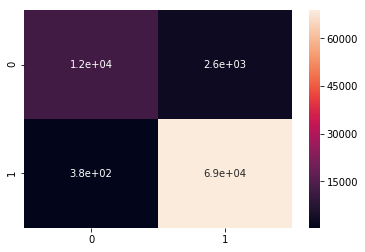

In [35]:
# Confusion Matrix Graph With Seaborn
sns.heatmap(matrix,annot=True)
plt.show()

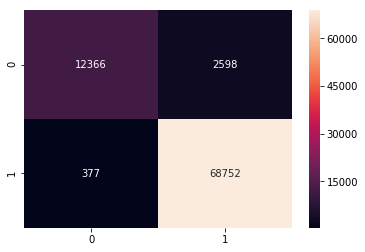

In [36]:
# Setting formate to integer with "d"
sns.heatmap(matrix,annot=True,fmt="d")
plt.show()

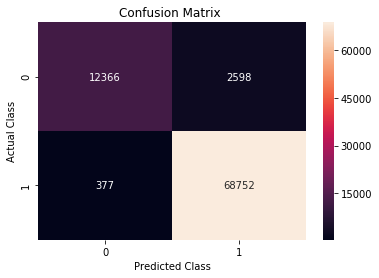

In [38]:
# Plot with Labels

plt.title('Confusion Matrix ')

sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
plt.xlabel('Predicted Class')
# Set y-axis label
plt.ylabel('Actual Class')
plt.show()

In [39]:
# Thanks For Watching
#J-Secur1ty
#Jesus Saves @ JCharisTech